### Import libraries 

In [3]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

## Load data from final csv

In [4]:
train = pd.read_csv("final_loan_train.csv")

In [5]:
train.columns

Index(['LoanAmountTerm', 'CreditHistory', 'LoanStatus', 'LoanAmountLog',
       'IncomeLog', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_Graduate', 'Education_Not Graduate',
       'SelfEmployed_No', 'SelfEmployed_Yes', 'PropertyArea_Rural',
       'PropertyArea_Semiurban', 'PropertyArea_Urban'],
      dtype='object')

In [6]:
y = train.LoanStatus
X = train.drop('LoanStatus',axis=1)

In [7]:
y.shape, X.shape

((614,), (614, 19))

## Logistic Regression

In [8]:
# Importing packages logistic regression and evaluation 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### Split data into train and test data 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [10]:
# logistic regression   
model = LogisticRegression(random_state=1, max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Check model's performance with train data 
model.score(X_train,y_train)

0.8044806517311609

In [12]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score :',score)   

Accuracy_score : 0.8292682926829268


In [13]:
model.intercept_, model.coef_

(array([-0.1430396]),
 array([[-1.24217937e-03,  3.26873346e+00, -3.54980723e-01,
          6.15679371e-02, -2.77701515e-02, -1.00819059e-01,
         -2.49947644e-01,  1.21358433e-01, -1.13963948e-01,
         -3.23863658e-01,  8.91251127e-02,  2.20113282e-01,
          1.40044596e-01, -2.68633807e-01, -1.10919028e-01,
         -1.76701828e-02, -3.69089953e-01,  3.55764110e-01,
         -1.15263368e-01]]))

In [14]:
y_pred_prob = model.predict_proba(X_test)

### Display confusion matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [16]:
tn = cm[0,0]
tp = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [17]:
print('Accuracy :', (tn + tp) / (tp + tn + fp + fn))

Accuracy : 0.8292682926829268


In [18]:
print('Sensitivity', tp / (tp + fn))

Sensitivity 0.9777777777777777


In [19]:
print("Positive Precision :", tp / (tp + fn))

Positive Precision : 0.9777777777777777


In [20]:
print('Specificity', tn / (tn + fp))

Specificity 0.42424242424242425


In [21]:
print("Negative Precision :", tn / (tn + fn))

Negative Precision : 0.875


### Display classification report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



### ROC

In [23]:
from sklearn.metrics import precision_recall_curve

In [24]:
precisions, recalls, thresholds = precision_recall_curve(y_test,y_pred)

In [25]:
precisions, recalls, thresholds

(array([0.73170732, 0.82242991, 1.        ]),
 array([1.        , 0.97777778, 0.        ]),
 array([0, 1], dtype=int64))

In [31]:
from sklearn.metrics import roc_curve, auc

In [27]:
fpr, tpr , thresholds = roc_curve(y_test,y_pred)

In [28]:
fpr,tpr,thresholds

(array([0.        , 0.57575758, 1.        ]),
 array([0.        , 0.97777778, 1.        ]),
 array([2, 1, 0], dtype=int64))

Text(0, 0.5, 'TPR')

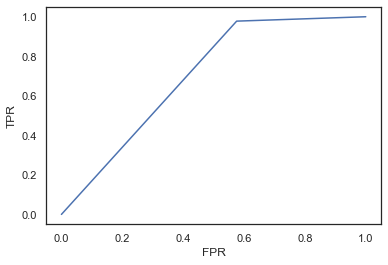

In [30]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [32]:
auc(fpr,tpr)

0.7010101010101011

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7010101010101011